![](figuras/logo.png)

<center>
    <h1>Proyecto Inteligencia Artificial</h1>
    <h4>Jesus Perez CI: </h4>
    <h4>Jenny Remolina CI: 20434745</h4>
    <h5>Febrero, 2020.</h5>
</center>

## Agenda

- Introducción
- Descripción de datos
- Exploración de datos
- Preparación de datos
- Entrenamiento y evaluación del modelo de aprendizaje automático
- Interpretando el modelo de aprendizaje automático
- Guardar el modelo
- Hacer predicciones con el modelo

## Introducción

Usaremos Aprendizaje Automático para predecir la posibilidad de una reserva para un hotel en función de la cancelación anterior como destino, a partir de un conjunto de datos que contiene información de reserva para un hotel urbano y un hotel turístico e incluye información de cuándo se realizó la reserva, la duración de la estadía, la cantidad de adultos, niños y / ó bebés, y la cantidad de espacios de estacionamiento disponibles, entre otras cosas.

Los datos fueron recopilados y puestos a disposición de el artículo Conjuntos de datos de demanda de reserva de hotel, escritos por Nuno Antonio, Ana Almeida y Luis Nunes para Data in Brief, Volumen 22, febrero de 2019.

Thomas Mock y Antoine Bichat descargaron y limpiaron los datos para #TidyTuesday durante la semana del 11 de febrero de 2020.

(https://www.kaggle.com/jessemostipak/hotel-booking-demand)

## Descripción de los Datos

Tenemos nuestros datos guardados en un archivo CSV llamado
`hotel_bookings.csv`. Primero leemos nuestro conjunto de datos a
un _dataframe_ de `pandas` llamado `reserva`, y luego usamos
la función `head()` para mostrar los primeros cinco registros
de nuestro conjunto de datos.

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
reserva = pd.read_csv('datos/hotel_bookings.csv')
reserva.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


ojooooooo descripción de datos

Asegurando de que nuestros datos estén limpios (no tiene valores nulos, etc.).

In [3]:
reserva.shape

(119390, 32)

In [4]:
reserva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
reserva.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


## Exploración de datos

Exploremos ahora nuestro conjunto de datos para tener una idea de cómo se ve y obtener algunas ideas al respecto.

Comencemos por encontrar la correlación de cada par de atributos (y la variable de resultado), y visualicemos las correlaciones usando un mapa de calor.

In [6]:
corr = reserva.corr()
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


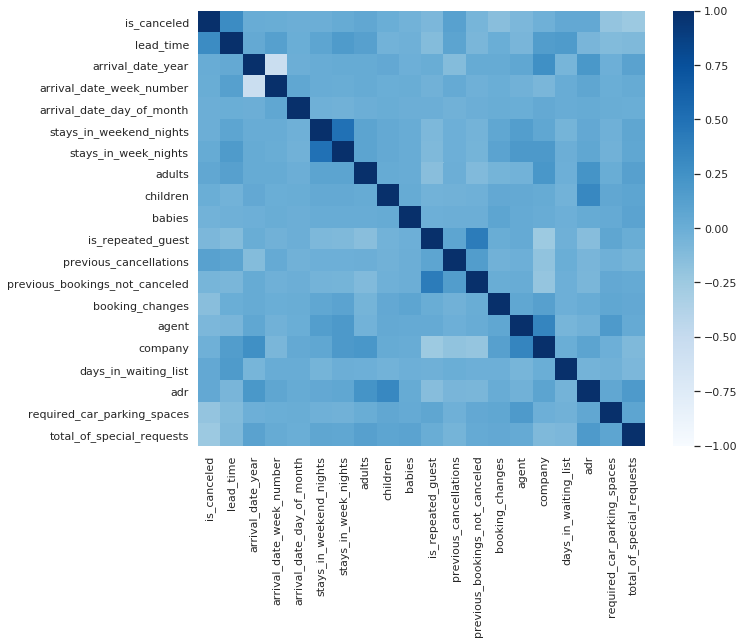

In [7]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', vmin=-1, vmax=1);

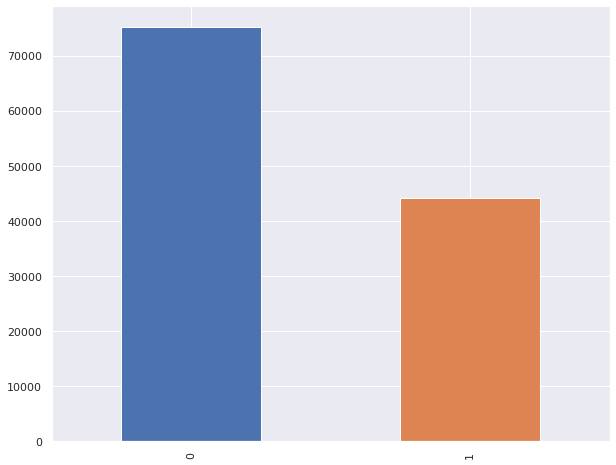

In [8]:
reserva.is_canceled.value_counts().plot.bar()

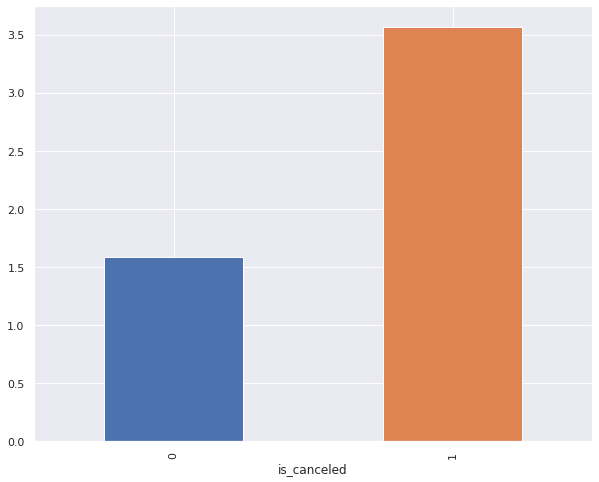

In [9]:
reserva.groupby("is_canceled")["days_in_waiting_list"].mean().plot.bar()

## Procesamiento de Datos

Ya que analizamos los datos y sabemos qué tenemos exactamente y qué debemos corregir, procedemos a realizar el preprocesamiento de datos.

In [10]:
pd.isnull(reserva).sum() > 0

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


### - Reemplazando los datos faltantes por la media

In [11]:
reserva.country.isnull().sum()

488

In [12]:
reserva.country.describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [13]:
top = 'PRT'

In [14]:
#Reemplazo los datos faltantes en country por la media de esta columna
reserva['country'] = reserva['country'].replace(np.nan, top)

In [15]:
reserva.agent.isnull().head(5)

0     True
1     True
2     True
3    False
4    False
Name: agent, dtype: bool

In [16]:
#Reemplazo los datos faltantes en agent por la media de esta columna
promedio = reserva["agent"].mean()
promedio

86.693381853469191

In [17]:
reserva['agent'] = reserva['agent'].replace(np.nan, promedio)

#Reemplazo los datos faltantes en company por la media de esta columna
promedio = reserva["company"].mean()
reserva['company'] = reserva['company'].replace(np.nan, promedio)

### - Eliminando valores nan

In [18]:
reserva["children"].mean()

0.10388990333874994

In [19]:
reserva.children.isnull().sum()

4

In [20]:
reserva = reserva.dropna()

### - Verificando que los atributos no contengan valores nan

In [21]:
pd.isnull(reserva).sum() > 0

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


### - Vista de los datos unicos
En este paso observamos los datos unicos de cada atributo para su posterior cambio de object a float64/int64

In [22]:
# Vista de los datos únicos 
reserva.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
       'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM',
       'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 

In [23]:
# Cambio los datos de hotel en números
reserva['hotel'].replace(['City Hotel','Resort Hotel'],[0,1],inplace=True)

# Cambio los datos de arrival_date_month en números
reserva['arrival_date_month'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

# Cambio los datos de meal en números
reserva['meal'].replace(['BB', 'FB', 'HB', 'SC', 'Undefined'],[0,1,2,3,4],inplace=True)

# Cambio el tipo de dato de date de object a int
reserva['reservation_status_date'] = pd.to_datetime(reserva["reservation_status_date"]).dt.strftime("%Y%m%d")

# Cambio los datos de reservation_status en números
reserva['reservation_status'].replace(['Canceled','Check-Out','No-Show'],[0,1,2],inplace=True)

# Cambio los datos de customer_type en números
reserva['customer_type'].replace(['Transient', 'Contract', 'Transient-Party', 'Group'],[0,1,2,3],inplace=True)

# Cambio los datos de deposit_type en números
reserva['deposit_type'].replace(['No Deposit', 'Refundable', 'Non Refund'],[0,1,2],inplace=True)

# Cambio los datos de reserved_room_type en números
reserva['reserved_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

# Cambio los datos de assigned_room_type en números
reserva['assigned_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

# Cambio los datos de market_segment en números
reserva['market_segment'].replace(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation'],[0,1,2,3,4,5,6,7],inplace=True)

# Cambio los datos de distribution_channel en números
reserva['distribution_channel'].replace(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'],[0,1,2,3,4],inplace=True)

# Cambio los datos de country en números
reserva['country'].replace(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
       'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM',
       'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK',
       'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP', 'GLP', 'KEN',
       'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA',
       'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV',
       'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL',
       'KIR', 'SDN', 'ATF', 'SLE', 'LAO'],[0,1,2,3,4,5,6,0,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175],inplace=True)

Observamos los cambios de tipo de datos de los atributos:

In [24]:
reserva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119386 non-null int64
is_canceled                       119386 non-null int64
lead_time                         119386 non-null int64
arrival_date_year                 119386 non-null int64
arrival_date_month                119386 non-null int64
arrival_date_week_number          119386 non-null int64
arrival_date_day_of_month         119386 non-null int64
stays_in_weekend_nights           119386 non-null int64
stays_in_week_nights              119386 non-null int64
adults                            119386 non-null int64
children                          119386 non-null float64
babies                            119386 non-null int64
meal                              119386 non-null int64
country                           119386 non-null int64
market_segment                    119386 non-null int64
distribution_channel              119386 non-nu

## Preparación del Conjunto de Datos

Al usar algoritmos de aprendizaje automático, siempre debemos dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba. Usaremos la función `train_test_split` de sklearn para dividir el conjunto de datos. Dividiremos el conjunto datos en 80% para el conjunto de entrenamiento y 20% para el conjunto de prueba.

In [25]:
from sklearn.model_selection import train_test_split
salida = reserva.is_canceled
attr = reserva.drop('is_canceled', 1)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(attr, salida, 
                                                                        test_size = 0.2, 
                                                                        random_state=42)
X_entrenamiento.head().T

,67705,115852,57349,11622,33333
hotel,0,0,0,1,1
lead_time,162,65,254,251,23
arrival_date_year,2017,2017,2016,2017,2017
arrival_date_month,5,7,9,5,2
arrival_date_week_number,18,28,39,21,7
arrival_date_day_of_month,6,10,24,21,18
stays_in_weekend_nights,2,1,1,2,1
stays_in_week_nights,1,1,1,4,1
adults,1,2,2,2,2
children,0,2,0,0,0


Como paso final antes de usar el aprendizaje automático, normalizaremos nuestras entradas. Los modelos de Aprendizaje Automático a menudo se benefician sustancialmente de la normalización de las entradas. También nos facilita la comprensión de la importancia de cada atributo más adelante, cuando observemos los pesos del modelo. Normalizaremos los datos de modo que cada atributo tenga media 0 y desviación estándar de 1.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_entrenamiento)
X_entrenamiento = sc.transform(X_entrenamiento)
X_prueba = sc.transform(X_prueba)

## Entrenamiento y Evaluación del Modelo de Aprendizaje Automático

Ahora podemos entrenar nuestro modelo de clasificación. Usaremos un modelo de aprendizaje automático simple llamado regresión logística. Dado que el modelo está disponible en `sklearn`. Primero, creamos una instancia llamada `Modelo_Reserva` y luego usamos la función `fit` para entrenar el modelo.

In [27]:
Modelo_Reserva = LogisticRegression()
Modelo_Reserva.fit(X_entrenamiento, y_entrenamiento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

A continuación, utilizaremos nuestros datos de prueba para conocer la exactitud del modelo.

In [28]:
exactitud = Modelo_Reserva.score(X_prueba, y_prueba)
print("exactitud = ", exactitud * 100, "%")

exactitud =  99.0032666052 %


## Interpretación del Modelo

Para tener una mejor idea de lo que está sucediendo dentro del modelo de regresión logística, podemos visualizar cómo nuestro modelo usa los diferentes atributos y qué atributos tienen un mayor efecto.

In [29]:
coeficientes = list(Modelo_Reserva.coef_[0])
etiquetas = list(attr.columns)
importancia = pd.DataFrame()
importancia['Atributos'] = etiquetas
importancia['importancia'] = coeficientes
importancia.sort_values(by=['importancia'], ascending=True, inplace=True)
importancia['positiva'] = importancia['importancia'] > 0
importancia.set_index('Atributos', inplace=True)
importancia

,importancia,positiva
Atributos,,
reservation_status_date,-10.292126,False
reservation_status,-2.964303,False
required_car_parking_spaces,-1.537281,False
total_of_special_requests,-0.238528,False
customer_type,-0.176403,False
hotel,-0.175068,False
assigned_room_type,-0.099951,False
booking_changes,-0.095356,False
previous_bookings_not_canceled,-0.095203,False


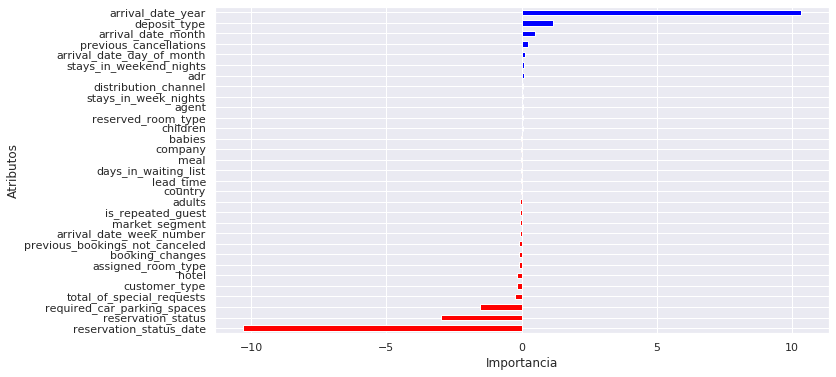

In [30]:
importancia.importancia.plot(kind='barh', figsize=(11, 6),color = importancia.positiva.map({True: 'blue', False: 'red'}))
plt.xlabel('Importancia');

### Algunas Conclusiones:

- El año de llegada en la reserva tienen una influencia significativa en el modelo.